# Small Image Classification Using Convolutional Neural Network (CNN)


![convert notebook to web app](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)


In [2]:
#import the necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load the dataset and check the shape of the dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
#check the type of the dataset
type(X_train)

numpy.ndarray

In [5]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
#convert the 2-D array to 1-D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
#convert the 2-D array to 1-D array
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [9]:
#different categories present in the dataset
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
#function to plot the image: function takes in the dataset and the indices of the image that needs to plot
def image_show(X, y, index):
    """
    takes in the images indices and the plots the image along with the label
    """ 
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

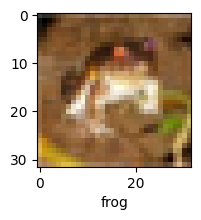

In [14]:
image_show(X_train, y_train, 0)

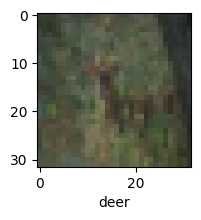

In [15]:
image_show(X_train, y_train, 10)

In [18]:
#Normalize the image data so the number reduces to 0 to 1, divide it by 255 as the image used here is in RGB
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
#biuld a CNN to train in the image dataset here we are using Max Pool
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
#visualize the cnn architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
#train the CNN using the training data
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 3ms/step - loss: 1.4749 - accuracy: 0.4698
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1202 - accuracy: 0.6067
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9972 - accuracy: 0.6531
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9091 - accuracy: 0.6831
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8393 - accuracy: 0.7080
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7763 - accuracy: 0.7299
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7243 - accuracy: 0.7471
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6801 - accuracy: 0.7634
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6391 - accuracy: 0.7758
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.60

As we can at the end of 10th Epoch accuracy is around 78%

In [27]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.9071 - accuracy: 0.7040


[0.9070912003517151, 0.7039999961853027]

In [28]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 1ms/step


array([[2.22288814e-04, 4.78752976e-04, 1.76923850e-03, 9.71804738e-01,
        3.58010730e-04, 2.14593224e-02, 3.26587656e-03, 1.31102315e-05,
        2.93052959e-04, 3.35638411e-04],
       [8.85280722e-04, 4.21460858e-03, 2.29368688e-05, 1.93244865e-09,
        1.00973864e-07, 5.13353415e-10, 3.14754089e-08, 9.46987933e-10,
        9.94846344e-01, 3.07364171e-05],
       [7.15266317e-02, 2.74328709e-01, 1.00054815e-02, 6.38132915e-02,
        2.15555681e-03, 2.84525100e-03, 2.96066864e-03, 3.91206890e-03,
        5.35426259e-01, 3.30260880e-02],
       [9.40672934e-01, 3.27924034e-03, 1.93338608e-03, 3.95107527e-05,
        2.55339523e-03, 8.42001464e-06, 7.78548128e-04, 1.41851764e-04,
        5.05798683e-02, 1.28395277e-05],
       [4.47815978e-07, 5.18266597e-06, 1.90295500e-03, 1.68829672e-02,
        3.56171578e-01, 2.32779584e-03, 6.22707248e-01, 7.59558361e-07,
        8.97606924e-07, 1.28668304e-07]], dtype=float32)

In [30]:
#getting the predicted classes
y_classes = [np.argmax(pred_class) for pred_class in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [31]:
#check the classes
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

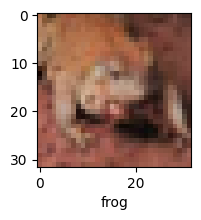

In [33]:
image_show(X_test, y_test,5)


In [35]:
classes[y_classes[5]]


'frog'

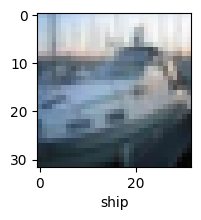

In [38]:
image_show(X_test, y_test,2)


In [39]:
classes[y_classes[2]]


'ship'

#### As we can see our model is quite accurate in predicting the classes